In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import numpy as np
import prettytable as pt
import pprint
def read_json_file(filename):
    with open(filename, 'r') as fp:
        data = fp.readlines()
    if len(data) == 1:
        data = json.loads(data[0])
    else:
        data = [json.loads(line) for line in data]
    return data 


def get_result(root_path):

    time_stamp = os.listdir(root_path)[0]
    result_filename = os.path.join(root_path, time_stamp, "result.jsonl" )
    data = read_json_file(result_filename)
    return data

def get_differen_bleu(result):
    all_bleu = {key:round(value, 2) for key, value in result.items()}
    tb = pt.PrettyTable()
    tb.field_names = all_bleu.keys()
    tb.add_row(all_bleu.values())
    print(tb)

## Load results

In [2]:
probings_types = ["lexical_probing","syntax_probing","semantic_probing","structure_probing"]
model_names = ["microsoft/unixcoder-base", "Enoch/Unixcoder-Tuned-Code-Search-Py", "random"]
paper_probing_type={"lexical_probing":"Lexical probing","syntax_probing":"Syntactic probing","semantic_probing":"Semantic probing","structure_probing":"Structure probing"}
all_results = {}
for probing_type in probings_types:
    all_results [probing_type] = {}
    for model_name in model_names:
        root_path = "../Probing/%s/saved_models/%s/%s/weighted-layer-wise"%(probing_type,probing_type,model_name)
        all_results [probing_type][model_name] = get_result(root_path,)

## Obtain the performance

In [3]:
performances = {}
for probing_type in probings_types:
    performances[paper_probing_type[probing_type]] = {}
    for model_name in  ["random","microsoft/unixcoder-base", "Enoch/Unixcoder-Tuned-Code-Search-Py"]:
        if model_name  == "microsoft/unixcoder-base":
            paper_model_name = "pre-trained"
        if model_name  == "Enoch/Unixcoder-Tuned-Code-Search-Py":
            paper_model_name = "fine-tuned"
        if model_name  == "random":
            paper_model_name = "random"
        if probing_type in ['semantic_probing']:
            performances [paper_probing_type[probing_type]][paper_model_name] = all_results [probing_type][model_name]['eval_map']
        else:
            performances [paper_probing_type[probing_type]][paper_model_name] = all_results [probing_type][model_name]['acc']
for probing_type in probings_types:
    print(50*"*")
    print(paper_probing_type[probing_type])
    get_differen_bleu( performances [ paper_probing_type[probing_type]])
print(50*"*")

**************************************************
Lexical probing
+--------+-------------+------------+
| random | pre-trained | fine-tuned |
+--------+-------------+------------+
| 76.14  |    99.98    |   99.95    |
+--------+-------------+------------+
**************************************************
Syntactic probing
+--------+-------------+------------+
| random | pre-trained | fine-tuned |
+--------+-------------+------------+
|  0.65  |     0.96    |    0.95    |
+--------+-------------+------------+
**************************************************
Semantic probing
+--------+-------------+------------+
| random | pre-trained | fine-tuned |
+--------+-------------+------------+
| 46.09  |    70.93    |   71.55    |
+--------+-------------+------------+
**************************************************
Structure probing
+--------+-------------+------------+
| random | pre-trained | fine-tuned |
+--------+-------------+------------+
|  34.8  |     29.7    |    62.2    |
+----

## Obtain the layer-wise weigths

In [4]:
i=0
pre_train_lexical_probing =   all_results[probings_types[0]][model_names [0]]['layer_weights']
pre_train_syntax_probing = all_results[probings_types[1]][model_names [0]]['layer_weights']
pre_train_semantic_probing =  all_results[probings_types[2]][model_names [0]]['layer_weights']
pre_train_structure_probing = all_results[probings_types[3]][model_names [0]]['layer_weights']

fine_tune_lexical_probing =  all_results[probings_types[0]][model_names [1]]['layer_weights']
fine_tune_syntax_probing = all_results[probings_types[1]][model_names [1]]['layer_weights']
fine_tune_semantic_probing =  all_results[probings_types[2]][model_names [1]]['layer_weights']
fine_tune_structure_probing = all_results[probings_types[3]][model_names [1]]['layer_weights']


## Visualize  layer-wise weigths

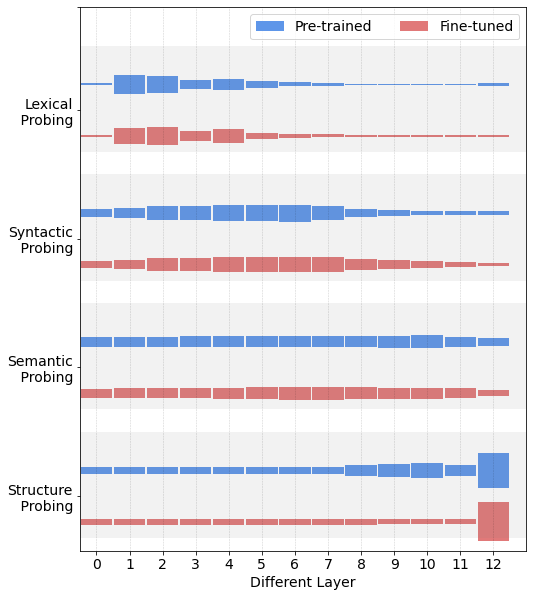

In [6]:
 os.makedirs("figures",exist_ok=True)
fontsize=14
ratio_fontsize=13
x = np.arange(13)
plt.figure(figsize=(8, 10))

gaps=[ 2,  6,  10, 14,17.2]
# lexical
pre_fine_string = ["Pre-trained","Fine-tuned"]
probing =lexical_probing= [pre_train_lexical_probing,fine_tune_lexical_probing ]
i=0
g=-2
delta=0.8
plt.bar(x, np.array(lexical_probing[i])+0.02, bottom =[gaps[g] +delta] *13, color = '#5E96E9', width =0.95,label=pre_fine_string[0])
plt.bar(x, -np.array(lexical_probing[i])-0.02, bottom =[gaps[g] +delta] *13, color = '#5E96E9', width =0.95)

i=1
plt.bar(x, np.array(lexical_probing[i])+0.02, bottom =[gaps[g] -delta] *13, color = '#E17979', width =0.95,label=pre_fine_string[1])
plt.bar(x, -np.array(lexical_probing[i])-0.02, bottom =[gaps[g] -delta] *13, color = '#E17979', width =0.95)

plt.fill_between(np.arange(-1,14), gaps[g] -delta-.5, gaps[g] +2, facecolor='gray', alpha=0.1)

# syntax
g=-3
probing = syntax_probing= [pre_train_syntax_probing,fine_tune_syntax_probing ]
i=0
plt.bar(x, np.array(syntax_probing[i])*1.5+0.05, bottom =[gaps[g] +delta] *13, color = '#5E96E9', width =0.95)
plt.bar(x, -np.array(syntax_probing[i])*1.5-0.05, bottom =[gaps[g] +delta] *13, color = '#5E96E9', width =0.95)

i=1
plt.bar(x, np.array(syntax_probing[i])*1.5+0.05, bottom =[gaps[g] -delta] *13, color = '#E17979', width =0.95)
plt.bar(x, -np.array(syntax_probing[i])*1.5-0.05, bottom =[gaps[g] -delta] *13, color = '#E17979', width =0.95)

# for a,b in zip(x, np.array(syntax_probing[i])*1.5+0.05):
#     plt.text(a,b+gaps[g] -delta, get_round_2(probing[i][a]), ha='center', va= 'bottom',fontsize=ratio_fontsize,rotation=25)

plt.fill_between(np.arange(-1,14), gaps[g] -delta-.5, gaps[g] +2, facecolor='gray', alpha=0.1)


# # semantic
g=-4
probing= semantic_probing= [pre_train_semantic_probing,fine_tune_semantic_probing ]
i=0
plt.bar(x, np.array(semantic_probing[i])*1.5+0.05, bottom =[gaps[g] + delta] *13, color = '#5E96E9', width =0.95)
plt.bar(x, -np.array(semantic_probing[i])*1.5-0.05, bottom =[gaps[g] + delta] *13, color = '#5E96E9', width =0.95)

i=1
plt.bar(x, np.array(semantic_probing[i])*1.5+0.05, bottom =[gaps[g] -delta] *13, color = '#E17979', width =0.95)
plt.bar(x, -np.array(semantic_probing[i])*1.5-0.05, bottom =[gaps[g] -delta] *13, color = '#E17979', width =0.95)

plt.fill_between(np.arange(-1,14), gaps[g] -delta-.5, gaps[g] +2, facecolor='gray', alpha=0.1)

# structure
g=-5
probing= [pre_train_structure_probing,fine_tune_structure_probing ]
i=0
plt.bar(x, np.array(probing[i])*1.5+0.05, bottom =[gaps[g] + delta] *13, color = '#5E96E9', width =0.95)
plt.bar(x, -np.array(probing[i])*1.5-0.05, bottom =[gaps[g] + delta] *13, color = '#5E96E9', width =0.95)

i=1
plt.bar(x, np.array(probing[i])+0.05, bottom =[gaps[g] -delta] *13, color = '#E17979', width =0.95)
plt.bar(x, -np.array(probing[i])-0.05, bottom =[gaps[g] -delta] *13, color = '#E17979', width =0.95)

plt.fill_between(np.arange(-1,14), gaps[g] -delta-.5, gaps[g] +2, facecolor='gray', alpha=0.1)   

plt.xlabel("Different Layer", fontsize=fontsize)


plt.yticks(gaps, ["Structure\n Probing",  "Semantic\n Probing","Syntactic\n Probing", "Lexical\n Probing", ""],fontsize=fontsize)
plt.xlim(xmin = -0.5, xmax = 13)
plt.ylim(ymin = gaps[0] -delta-.9, ymax = gaps[-1])
plt.xticks(x,x, fontsize=fontsize)

# grid
plt.grid( axis='x', linewidth = 0.5,alpha=0.2,color ="black", linestyle = '--',)

figure_name="figures/probing_weight.pdf"

plt.legend(loc="upper right",ncol=2,fontsize=fontsize)
plt.savefig(figure_name,dpi=600,format="pdf", bbox_inches='tight')